In [1]:
import numpy as np
import cPickle as pickle
import time

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
sns.set(color_codes=True)

In [2]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, points):
        self.points = points
        self.total = len(points)
        self.xmin = min([k[0] for k in self.points])
        self.ymin = min([k[1] for k in self.points])
        self.xmax = max([k[0] for k in self.points])
        self.ymax = max([k[1] for k in self.points])
        self.xpos = (np.floor(self.xmin)+np.ceil(self.xmax))/2.
        self.ypos = np.ceil(self.ymax) - 0.1 if (np.ceil(self.ymax)-np.floor(self.ymin)==1) else np.ceil(self.ymax) - 0.5
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        self.ann_list = []
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=1000,frames=self.total,
                                           init_func=self.setup_plot, blit=True, repeat=False)
        
    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        self.ax.set(xlim=(np.floor(self.xmin), np.ceil(self.xmax)), ylim=(np.floor(self.ymin), np.ceil(self.ymax)))
        self.scat = self.ax.scatter([], [], animated=True)
        return self.scat,
    
    # Create the update function that returns all the
    # objects that have changed
    def update(self, i):
        """Update the scatter plot."""
        # remove previous annotation
        for j,a in enumerate(self.ann_list):
            a.remove()
        self.ann_list[:] = []
        
        x_i, y_i, ts = self.points[i]
        self.scat = self.ax.scatter(x_i, y_i)
        ann = self.ax.annotate(ts, (self.xpos, self.ypos))
        self.ann_list.append(ann)
        return self.scat, 

    def show(self):
        plt.show()

In [3]:
df = pickle.load(open('data_for_animation.pkl'))

<IPython.core.display.Javascript object>


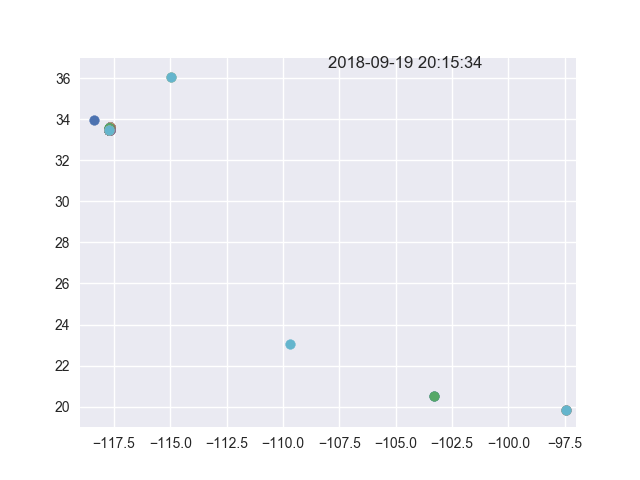

In [5]:
id1 = AnimatedScatter(df['path'].iloc[3])
id1.show()